In [1]:
import dotenv

dotenv.load_dotenv()

True

In [2]:
import plotdevice
from plotdevice.plot_with_matplotlib import plot
import matplotlib.pyplot as plt
import numpy as np

## MuP Runs that determined OLMo 3 LR

This was run on:
- OLMo 2 arch (peteish7)
- Old data
- 4096 seq len, 128 instances per batch (0.5M global batch size). Optimal LR was adjusted to 4M post-hoc.

There is a muP weight decay bug that affected this run. This appears to have had a decisive effect.
Subsequent experiments will provide evidence for this.

In [25]:
lrs = [
    "7.81e-3",
    "3.91e-3",
    "1.95e-3",
    "9.77e-4",
    "4.88e-4",
    "2.44e-4",
    "1.22e-4",
    "6.10e-5",
    "3.05e-5",
]

ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}$", name=lr).get_time_series("train/CE loss")
    for lr in lrs
]

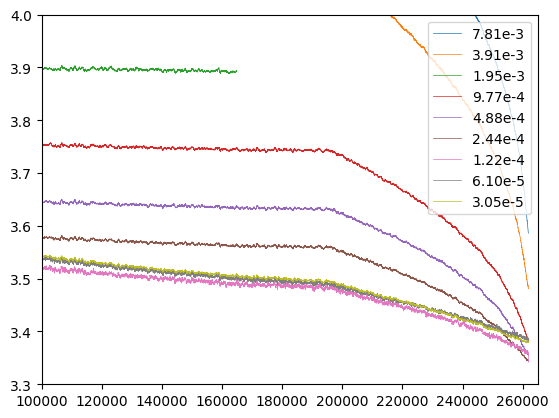

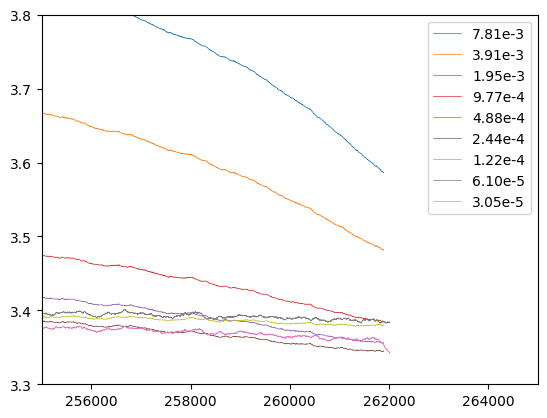

In [45]:
plot(ts, moving_average_smoothing=500, xlim=(100000., 265000), ylim=(3.3, 4))
plot(ts, moving_average_smoothing=500, xlim=(255000., 265000), ylim=(3.3, 3.8))

## Experiment 2: Merge main + New data

This run differs from the original in the following ways:
- It has received various updates from main and some muP updates (the latter turns out to be important).
- New data is used.

The loss curves are more similar between the different LRs compared to the initial experiment,
and the optimal LR is 10x higher (~1e-3 compared to 1.22e-4).

This experiment was not fully faithful to OLMo 3 in some ways (seq len, sliding window, head qk norm).
The next few experiments try breach this gap.

In [29]:
lrs = [
    "7.81e-3",
    "3.91e-3",
    "1.95e-3",
    "9.77e-4",
    "4.88e-4",
    "2.44e-4",
    "1.22e-4",
    "6.10e-5",
    "3.05e-5",
]

newdata_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}-newdata$", name=lr).get_time_series("train/CE loss")
    for lr in lrs
]

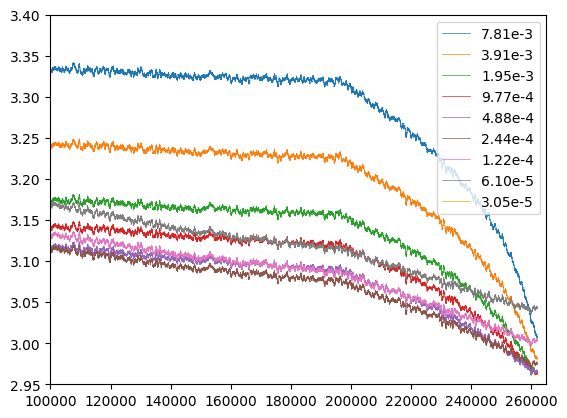

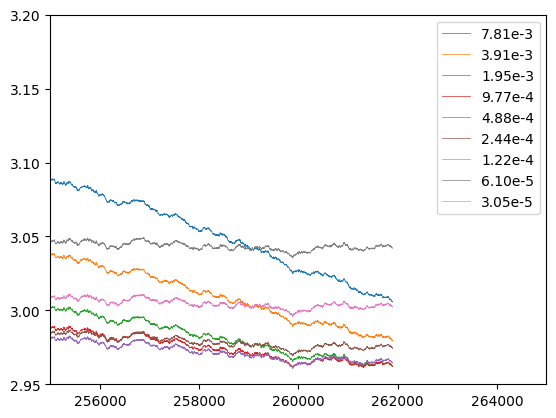

In [46]:
plot(newdata_ts, moving_average_smoothing=500, xlim=(100000., 265000), ylim=(2.95, 3.4))
plot(newdata_ts, moving_average_smoothing=500, xlim=(255000., 265000), ylim=(2.95, 3.2))

## Experiment 3: OLMo 3 setup

This experiment runs an OLMo 3 setup (intradoc masking, head qk norm, etc.) with 2 configurations
on a small set of LRs:
- Old data + muP weight decay bug enabled
- Old data + muP weight decay bug disabled
- New data + muP weight decay bug disabled

The latter

In [3]:
METRICS = [
    "train/CE loss",
    "eval/downstream/basic_skills_common_knowledge_rc_5shot (soft loss v2)",
]
METRICS_METADATA = {
    "train/CE loss": {
        "optimize_min": True,
    },
    "eval/lm/c4_en-validation/CE loss": {
        "optimize_min": True,
    },
    "eval/downstream/basic_skills_common_knowledge_rc_5shot (soft loss v2)": {
        "optimize_min": False,
    },
    "eval/downstream/basic_skills_coding_rc_5shot (soft loss v2)": {
        "optimize_min": False,
    },
    "eval/downstream/basic_skills_pattern_rc_5shot (soft loss v2)": {
        "optimize_min": False,
    }
}
METRIC = METRICS[0]
OPTIMIZE_MIN = METRICS_METADATA[METRIC]["optimize_min"]

In [ ]:
original_lrs = [
    "7.81e-3",
    "3.91e-3",
    # "1.95e-3",
    "9.77e-4",
    "4.88e-4",
    "2.44e-4",
    "1.22e-4",
    "6.10e-5",
]
olmo3_original_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}$", name=f"original-{lr}")
    .get_time_series(METRIC).smooth_with_moving_average(10)
    for lr in original_lrs
]

nowdfix_olddata_lrs = [
    "7.81e-3",
    # "3.91e-3",
    "1.95e-3",
    # "9.77e-4",
    "4.88e-4",
    # "2.44e-4",
    "1.22e-4",
    # "6.10e-5",
    # "3.05e-5",
]
olmo3_nowdfix_olddata_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}-olmo3-nowdfix-olddata$", name=f"nowdfix-olddata-{lr}")
    .get_time_series(METRIC).smooth_with_moving_average(10)
    for lr in nowdfix_olddata_lrs
]

olddata_lrs = [
    "7.81e-3",
    "3.91e-3",
    "1.95e-3",
    "9.77e-4",
    "4.88e-4",
    "2.44e-4",
    "1.22e-4",
    "6.10e-5",
]
olmo3_olddata_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}-olmo3-olddata$", name=f"olddata-{lr}")
    .get_time_series(METRIC).smooth_with_moving_average(10)
    for lr in olddata_lrs
]

newdata_lrs = [
    "3.13e-2",
    "1.56e-2",
    "7.81e-3",
    "3.91e-3",
    "1.95e-3",
    "9.77e-4",
    "4.88e-4",
    "2.44e-4",
    "1.22e-4",
    "6.10e-5",
    # "3.05e-5",
]
olmo3v3_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}-olmo3v3$", name=f"newdata-{lr}")
    .get_time_series(METRIC).smooth_with_moving_average(10)
    for lr in newdata_lrs
]

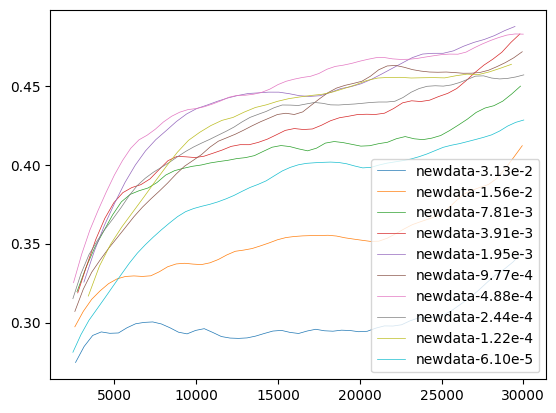

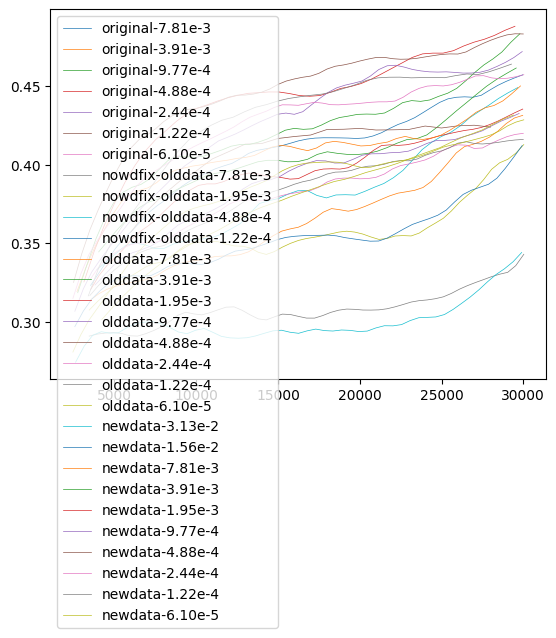

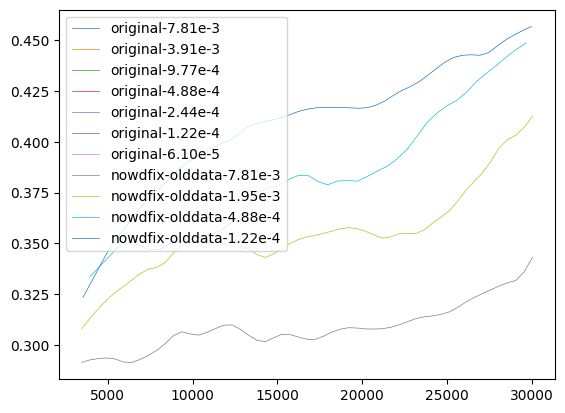

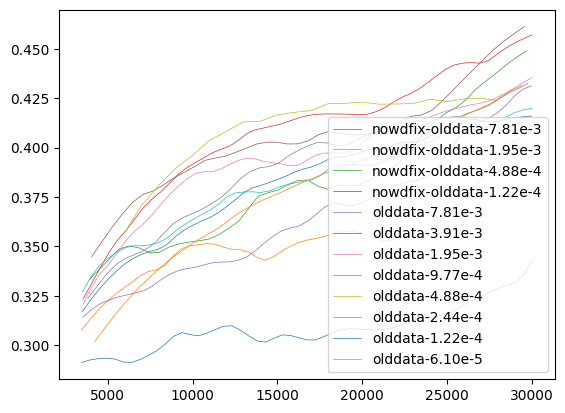

In [213]:
# plot(olmo3_nowdfix_olddata_ts, moving_average_smoothing=500, ylim=(2.9, 3.5))
plot(olmo3v3_ts)
plot(olmo3_original_ts + olmo3_nowdfix_olddata_ts + olmo3_olddata_ts + olmo3v3_ts)
plot(olmo3_original_ts + olmo3_nowdfix_olddata_ts)
plot(olmo3_nowdfix_olddata_ts + olmo3_olddata_ts)

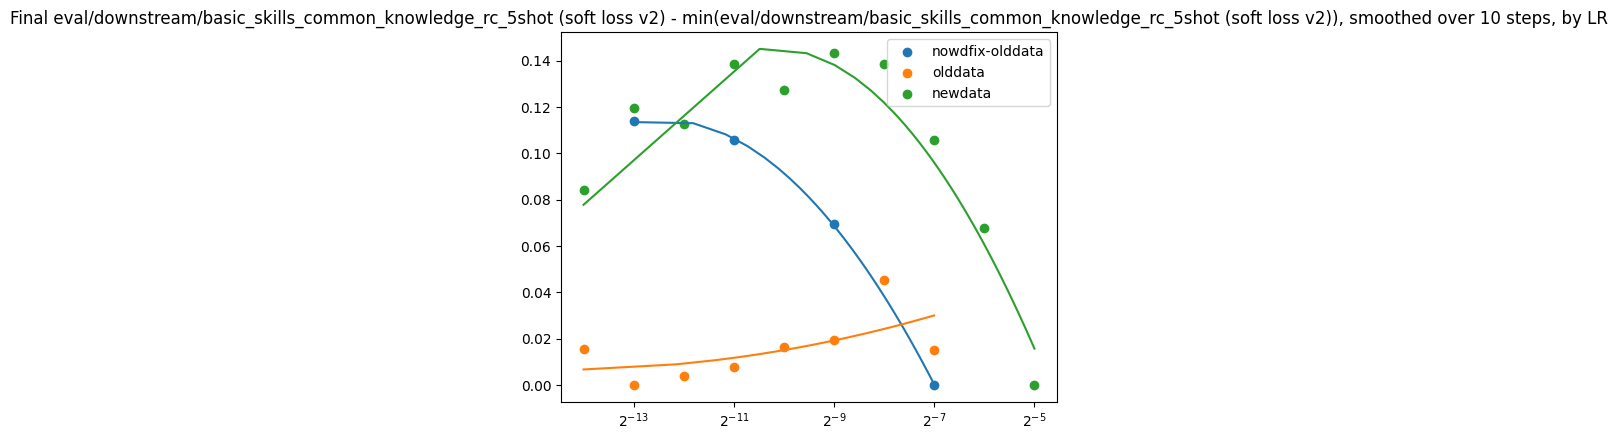

In [215]:
nowdfix_olddata_xs = list(map(float, nowdfix_olddata_lrs))
olddata_xs = list(map(float, olddata_lrs))
newdata_xs = list(map(float, newdata_lrs))

nowdfix_olddata_ys = np.array(list(map(lambda t: t.ys[-1], olmo3_nowdfix_olddata_ts)))
olddata_ys = np.array(list(map(lambda t: t.ys[-1], olmo3_olddata_ts)))
olmo3v3_ys = np.array(list(map(lambda t: t.ys[-1], olmo3v3_ts)))

if METRIC == "train/CE loss":
    original_xs = list(map(float, original_lrs))
    original_ys = np.array(list(map(lambda t: t.ys[-1] if len(t.ys) > 0 else None, olmo3_original_ts)))
    plt.scatter(original_xs, original_ys - min(original_ys), label="original (smaller batch size, seq len)")
    plt.plot(np.linspace(original_xs[0], original_xs[-1]), np.poly1d(np.polyfit(np.log2(original_xs), original_ys - min(original_ys), 2))(np.log2(np.linspace(original_xs[0], original_xs[-1]))))
plt.scatter(nowdfix_olddata_xs, nowdfix_olddata_ys - min(nowdfix_olddata_ys), label="nowdfix-olddata")
plt.plot(np.linspace(nowdfix_olddata_xs[0], nowdfix_olddata_xs[-1]), np.poly1d(np.polyfit(np.log2(nowdfix_olddata_xs), nowdfix_olddata_ys - min(nowdfix_olddata_ys), 2))(np.log2(np.linspace(nowdfix_olddata_xs[0], nowdfix_olddata_xs[-1]))))
plt.scatter(olddata_xs, olddata_ys - min(olddata_ys), label="olddata")
plt.plot(np.linspace(olddata_xs[0], olddata_xs[-1]), np.poly1d(np.polyfit(np.log2(olddata_xs), olddata_ys - min(olddata_ys), 2))(np.log2(np.linspace(olddata_xs[0], olddata_xs[-1]))))
plt.scatter(newdata_xs, olmo3v3_ys - min(olmo3v3_ys), label="newdata")
plt.plot(np.linspace(newdata_xs[0], newdata_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_xs), olmo3v3_ys - min(olmo3v3_ys), 2))(np.log2(np.linspace(newdata_xs[0], newdata_xs[-1]))))
plt.legend()
plt.xscale('log', base=2)
# plt.xticks(ticks=newdata_xs, labels=newdata_lrs)
plt.title(f"Final {METRIC} - min({METRIC}), smoothed over 10 steps, by LR")
plt.show()

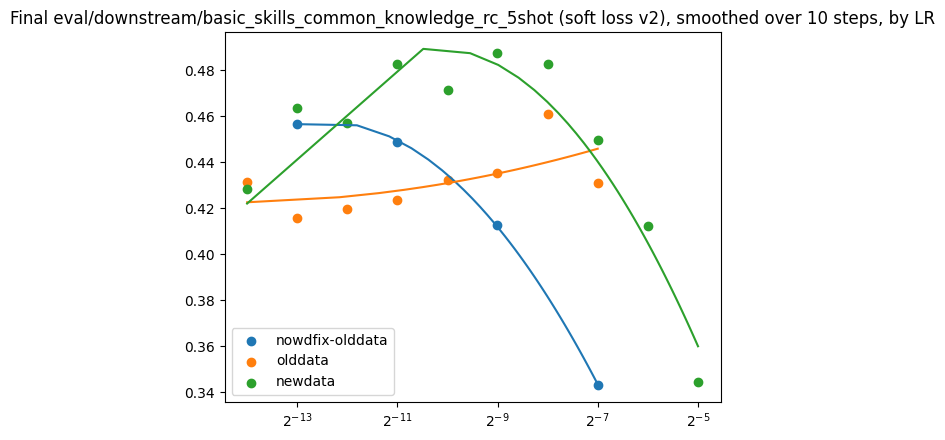

In [216]:
nowdfix_olddata_xs = list(map(float, nowdfix_olddata_lrs))
olddata_xs = list(map(float, olddata_lrs))
newdata_xs = list(map(float, newdata_lrs))

nowdfix_olddata_ys = np.array(list(map(lambda t: t.ys[-1], olmo3_nowdfix_olddata_ts)))
olddata_ys = np.array(list(map(lambda t: t.ys[-1], olmo3_olddata_ts)))
olmo3v3_ys = np.array(list(map(lambda t: t.ys[-1], olmo3v3_ts)))


if METRIC == "train/CE loss":
    original_xs = list(map(float, original_lrs))
    original_ys = np.array(list(map(lambda t: t.ys[-1], olmo3_original_ts)))
    plt.scatter(original_xs, original_ys, label="original (smaller batch size, seq len)")
    plt.plot(np.linspace(original_xs[0], original_xs[-1]), np.poly1d(np.polyfit(np.log2(original_xs), original_ys, 2))(np.log2(np.linspace(original_xs[0], original_xs[-1]))))
plt.scatter(nowdfix_olddata_xs, nowdfix_olddata_ys, label="nowdfix-olddata")
plt.plot(np.linspace(nowdfix_olddata_xs[0], nowdfix_olddata_xs[-1]), np.poly1d(np.polyfit(np.log2(nowdfix_olddata_xs), nowdfix_olddata_ys, 2))(np.log2(np.linspace(nowdfix_olddata_xs[0], nowdfix_olddata_xs[-1]))))
plt.scatter(olddata_xs, olddata_ys, label="olddata")
plt.plot(np.linspace(olddata_xs[0], olddata_xs[-1]), np.poly1d(np.polyfit(np.log2(olddata_xs), olddata_ys, 2))(np.log2(np.linspace(olddata_xs[0], olddata_xs[-1]))))
plt.scatter(newdata_xs, olmo3v3_ys, label="newdata")
plt.plot(np.linspace(newdata_xs[0], newdata_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_xs), olmo3v3_ys, 2))(np.log2(np.linspace(newdata_xs[0], newdata_xs[-1]))))
plt.legend()
plt.xscale('log', base=2)
# plt.xticks(ticks=xs, labels=lrs)
plt.title(f"Final {METRIC}, smoothed over 10 steps, by LR")
plt.show()

# Graveyard

In [ ]:
lrs = [
    "7.81e-3",
    "3.91e-3",
    "1.95e-3",
    "9.77e-4",
    "4.88e-4",
    "2.44e-4",
    "1.22e-4",
    "6.10e-5",
    "3.05e-5",
]

olmo3ish_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}-olmo3ish$", name=lr)
    .get_time_series(METRIC)
    for lr in lrs
]

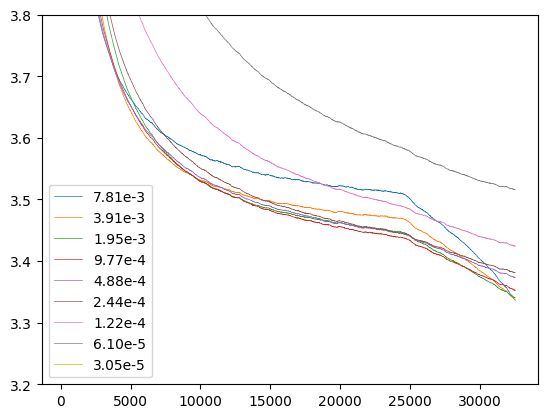

In [ ]:
plot(olmo3ish_ts, moving_average_smoothing=500, ylim=(3.2, 3.8))

In [225]:
newdata_370M_lrs = [
    "1.56e-2",
    "7.81e-3",
    "3.91e-3",
    "1.95e-3",
    "9.77e-4",
    "4.88e-4",
    "2.44e-4",
]

olmo3v3_60M_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}-olmo3v3$", name=f"60M-{lr}")
    .get_time_series(METRIC).smooth_with_moving_average(10)
    for lr in lrs
]

olmo3v3_370M_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-370M-lr{lr}-olmo3v3$", name=f"370M-{lr}")
    .get_time_series(METRIC).smooth_with_moving_average(10)
    for lr in lrs
]

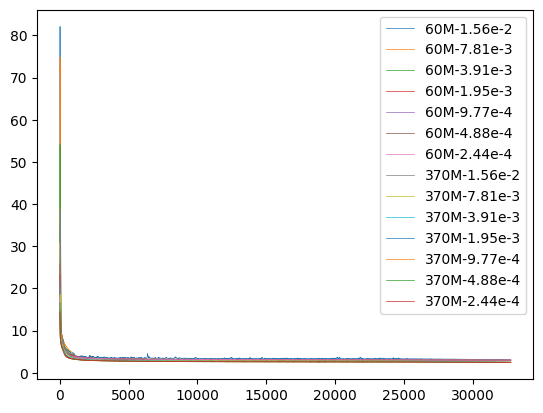

In [226]:
plot(olmo3v3_60M_ts + olmo3v3_370M_ts, moving_average_smoothing=0)

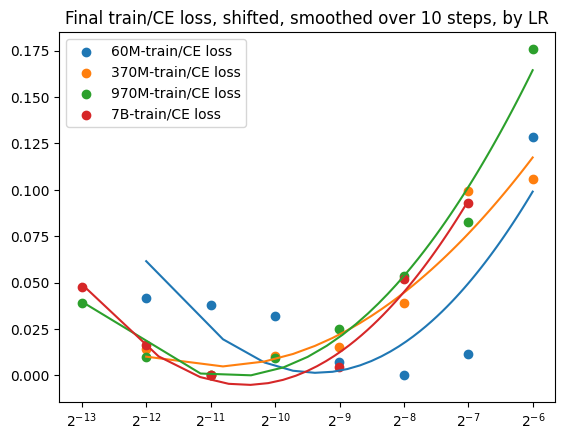

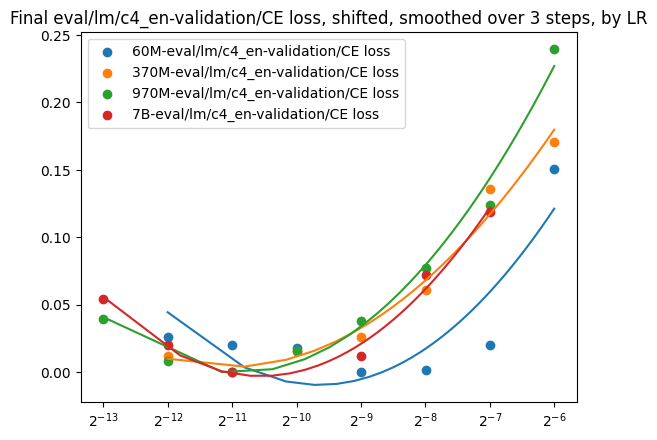

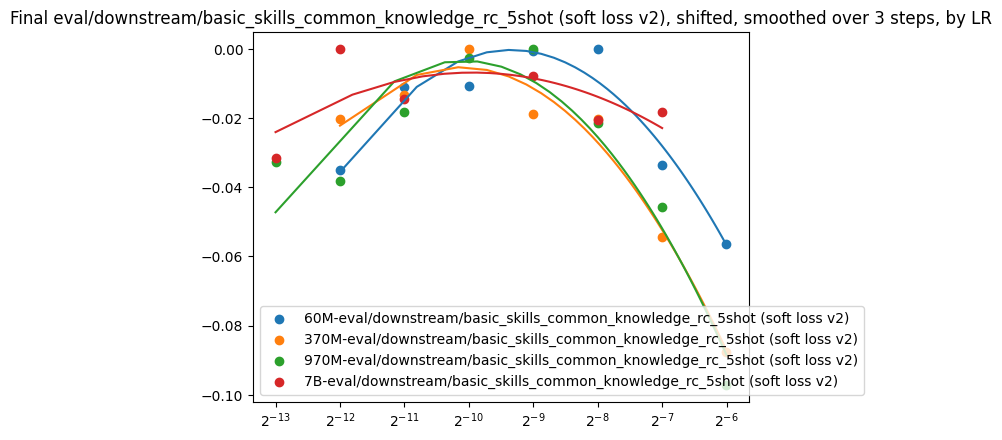

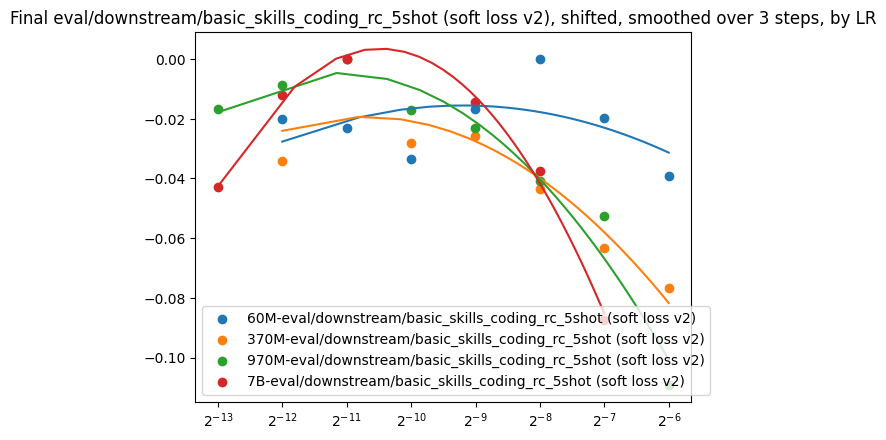

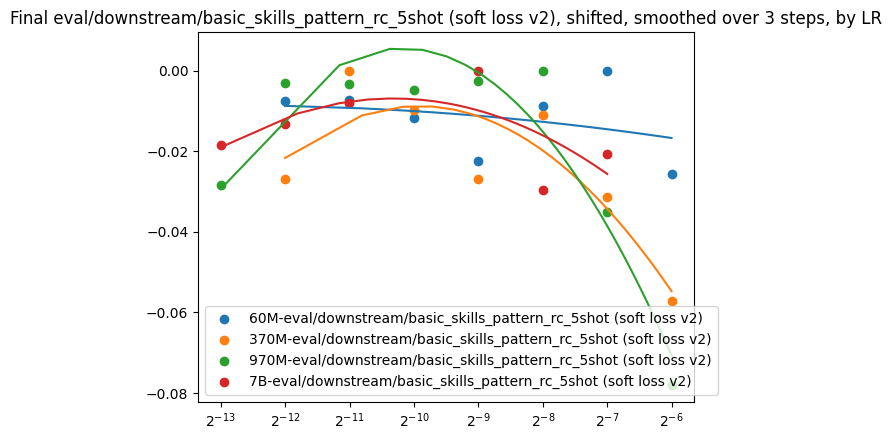

In [8]:
def plot_by_size(metric: str):
    smoothing = 3 if metric != "train/CE loss" else 10
    newdata_60M_lrs = [
        "1.56e-2",
        "7.81e-3",
        "3.91e-3",
        "1.95e-3",
        "9.77e-4",
        "4.88e-4",
        "2.44e-4",
    ]
    newdata_370M_lrs = list(newdata_60M_lrs)
    newdata_970M_lrs = [
        "1.56e-2",
        "7.81e-3",
        "3.91e-3",
        "1.95e-3",
        "9.77e-4",
        "4.88e-4",
        "2.44e-4",
        "1.22e-4",
    ]
    newdata_7B_lrs = [
        "7.81e-3",
        "3.91e-3",
        "1.95e-3",
        # "9.77e-4",
        "4.88e-4",
        "2.44e-4",
        "1.22e-4",
    ]

    olmo3v3_60M_ts = [
        plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-60M-lr{lr}-olmo3v3$", name=f"60M-{lr}")
        .get_time_series(metric).smooth_with_moving_average(smoothing)
        for lr in newdata_60M_lrs
    ]
    olmo3v3_370M_ts = [
        plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-370M-lr{lr}-olmo3v3$", name=f"370M-{lr}")
        .get_time_series(metric).smooth_with_moving_average(smoothing)
        for lr in newdata_370M_lrs
    ]
    olmo3v3_970M_ts = [
        plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-970M-lr{lr}-olmo3v3$", name=f"970M-{lr}")
        .get_time_series(metric).smooth_with_moving_average(smoothing)
        for lr in newdata_970M_lrs
    ]
    olmo3v3_7B_ts = [
        plotdevice.CometmlRun("ai2", "olmo2-mup-ladder", f"mup-7B-lr{lr}-olmo3v3$", name=f"7B-{lr}")
        .get_time_series(metric).smooth_with_moving_average(smoothing)
        for lr in newdata_7B_lrs
    ]

    newdata_60M_xs = list(map(float, newdata_60M_lrs))
    newdata_370M_xs = list(map(float, newdata_370M_lrs))
    newdata_970M_xs = list(map(float, newdata_970M_lrs))
    newdata_7B_xs = list(map(float, newdata_7B_lrs))

    olmo3v3_60M_ys = np.array(list(map(lambda t: t.ys[-1], olmo3v3_60M_ts)))
    olmo3v3_370M_ys = np.array(list(map(lambda t: t.ys[-1], olmo3v3_370M_ts)))
    olmo3v3_970M_ys = np.array(list(map(lambda t: t.ys[-1], olmo3v3_970M_ts)))
    olmo3v3_7B_ys = np.array(list(map(lambda t: t.ys[-1], olmo3v3_7B_ts)))

    def shift(ys: np.ndarray, metric: str):
        if METRICS_METADATA[metric]["optimize_min"]:
            return ys - min(ys)

        return ys - max(ys)

    plt.scatter(newdata_60M_xs, shift(olmo3v3_60M_ys, metric), label=f"60M-{metric}")
    plt.plot(np.linspace(newdata_60M_xs[0], newdata_60M_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_60M_xs), shift(olmo3v3_60M_ys, metric), 2))(np.log2(np.linspace(newdata_60M_xs[0], newdata_60M_xs[-1]))))
    plt.scatter(newdata_370M_xs, shift(olmo3v3_370M_ys, metric), label=f"370M-{metric}")
    plt.plot(np.linspace(newdata_370M_xs[0], newdata_370M_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_370M_xs), shift(olmo3v3_370M_ys, metric), 2))(np.log2(np.linspace(newdata_370M_xs[0], newdata_370M_xs[-1]))))
    plt.scatter(newdata_970M_xs, shift(olmo3v3_970M_ys, metric), label=f"970M-{metric}")
    plt.plot(np.linspace(newdata_970M_xs[0], newdata_970M_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_970M_xs), shift(olmo3v3_970M_ys, metric), 2))(np.log2(np.linspace(newdata_970M_xs[0], newdata_970M_xs[-1]))))
    plt.scatter(newdata_7B_xs, shift(olmo3v3_7B_ys, metric), label=f"7B-{metric}")
    plt.plot(np.linspace(newdata_7B_xs[0], newdata_7B_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_7B_xs), shift(olmo3v3_7B_ys, metric), 2))(np.log2(np.linspace(newdata_7B_xs[0], newdata_7B_xs[-1]))))

    # plt.scatter(newdata_60M_xs, olmo3v3_60M_ys, label=f"60M-{metric}")
    # plt.plot(np.linspace(newdata_60M_xs[0], newdata_60M_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_60M_xs), olmo3v3_60M_ys, 2))(np.log2(np.linspace(newdata_60M_xs[0], newdata_60M_xs[-1]))))
    # plt.scatter(newdata_370M_xs, olmo3v3_370M_ys, label=f"370M-{metric}")
    # plt.plot(np.linspace(newdata_370M_xs[0], newdata_370M_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_370M_xs), olmo3v3_370M_ys, 2))(np.log2(np.linspace(newdata_370M_xs[0], newdata_370M_xs[-1]))))

    plt.legend()
    plt.xscale('log', base=2)
    # plt.xticks(ticks=newdata_60M_xs, labels=newdata_lrs)
    plt.title(f"Final {metric}, shifted, smoothed over {smoothing} steps, by LR")
    plt.show()

metrics = [
    "train/CE loss",
    "eval/lm/c4_en-validation/CE loss",
    "eval/downstream/basic_skills_common_knowledge_rc_5shot (soft loss v2)",
    "eval/downstream/basic_skills_coding_rc_5shot (soft loss v2)",
    "eval/downstream/basic_skills_pattern_rc_5shot (soft loss v2)",
]

for metric in metrics:
    plot_by_size(metric)

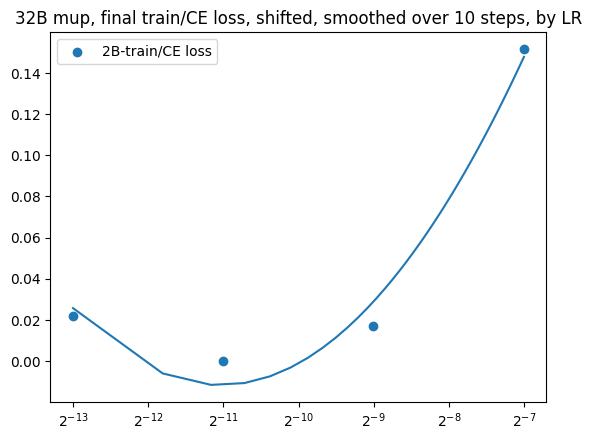

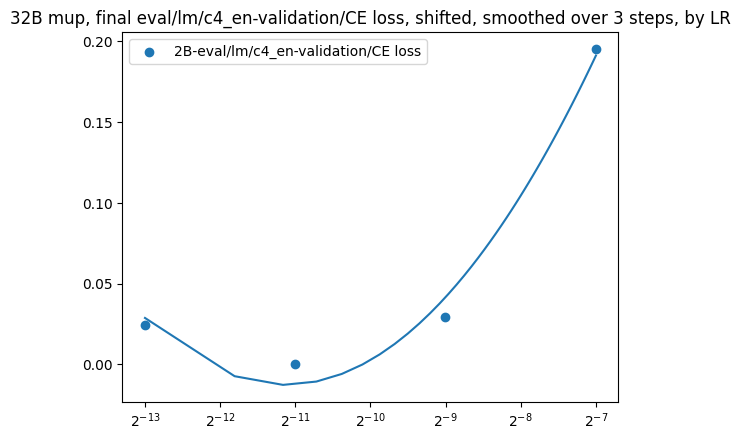

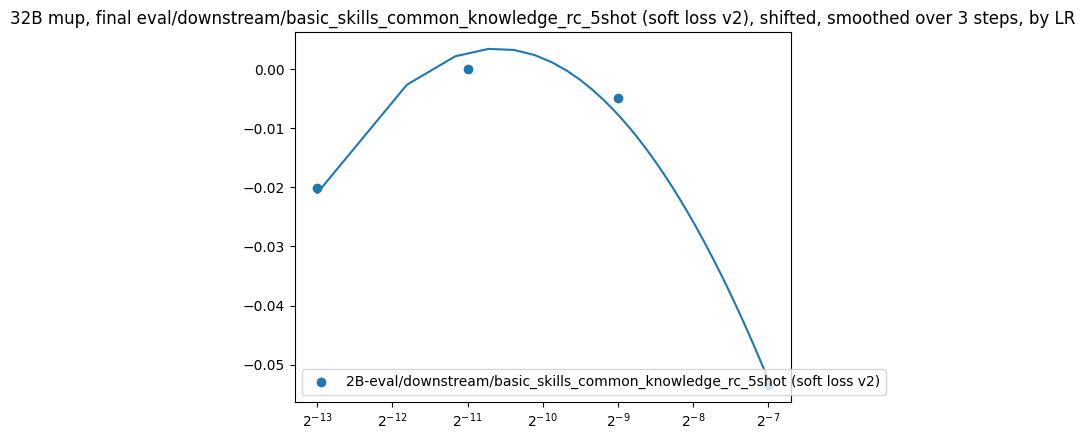

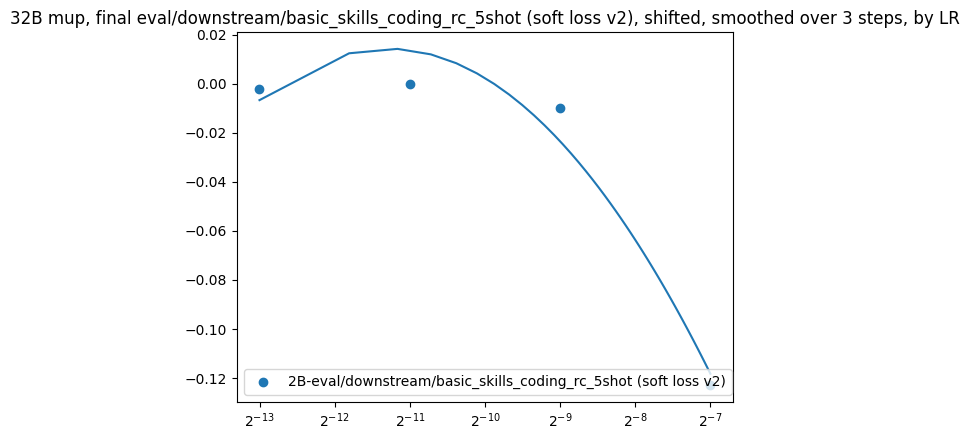

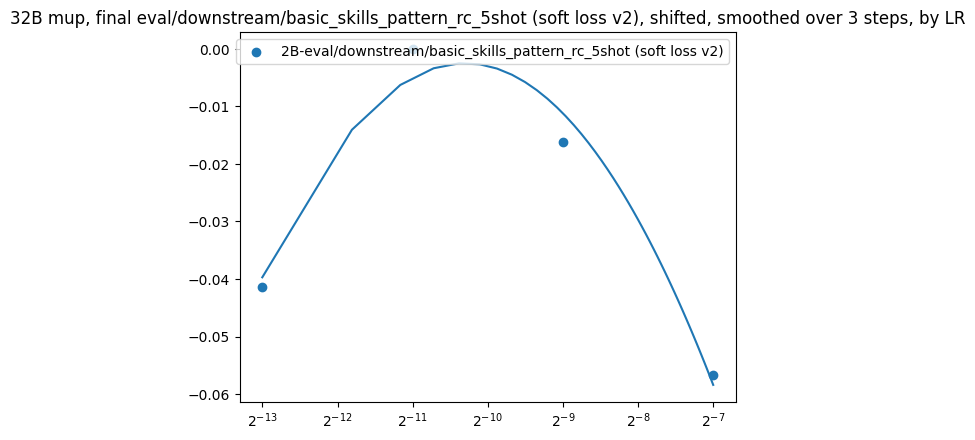

In [6]:
def plot_32B_mup(metric: str):
    smoothing = 3 if metric != "train/CE loss" else 10
    lrs = [
        # "1.56e-2",
        "7.81e-3",
        # "3.91e-3",
        "1.95e-3",
        # "9.77e-4",
        "4.88e-4",
        # "2.44e-4",
        "1.22e-4",
    ]

    olmo25_2B_ts = [
        plotdevice.CometmlRun("ai2", "olmo2-5-32bmup-ladder", f"mup32B-2140M-lr{lr}-olmo3$", name=f"2B-{lr}")
        .get_time_series(metric).smooth_with_moving_average(smoothing)
        for lr in lrs
    ]

    xs = list(map(float, lrs))

    olmo25_2B_ys = np.array(list(map(lambda t: t.ys[-1], olmo25_2B_ts)))

    def shift(ys: np.ndarray, metric: str):
        if METRICS_METADATA[metric]["optimize_min"]:
            return ys - min(ys)

        return ys - max(ys)

    plt.scatter(xs, shift(olmo25_2B_ys, metric), label=f"2B-{metric}")
    plt.plot(np.linspace(xs[0], xs[-1]), np.poly1d(np.polyfit(np.log2(xs), shift(olmo25_2B_ys, metric), 2))(np.log2(np.linspace(xs[0], xs[-1]))))

    # plt.scatter(newdata_60M_xs, olmo3v3_60M_ys, label=f"60M-{metric}")
    # plt.plot(np.linspace(newdata_60M_xs[0], newdata_60M_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_60M_xs), olmo3v3_60M_ys, 2))(np.log2(np.linspace(newdata_60M_xs[0], newdata_60M_xs[-1]))))
    # plt.scatter(newdata_370M_xs, olmo3v3_370M_ys, label=f"370M-{metric}")
    # plt.plot(np.linspace(newdata_370M_xs[0], newdata_370M_xs[-1]), np.poly1d(np.polyfit(np.log2(newdata_370M_xs), olmo3v3_370M_ys, 2))(np.log2(np.linspace(newdata_370M_xs[0], newdata_370M_xs[-1]))))

    plt.legend()
    plt.xscale('log', base=2)
    # plt.xticks(ticks=newdata_60M_xs, labels=newdata_lrs)
    plt.title(f"32B mup, final {metric}, shifted, smoothed over {smoothing} steps, by LR")
    plt.show()

metrics = [
    "train/CE loss",
    "eval/lm/c4_en-validation/CE loss",
    "eval/downstream/basic_skills_common_knowledge_rc_5shot (soft loss v2)",
    "eval/downstream/basic_skills_coding_rc_5shot (soft loss v2)",
    "eval/downstream/basic_skills_pattern_rc_5shot (soft loss v2)",
]

for metric in metrics:
    plot_32B_mup(metric)

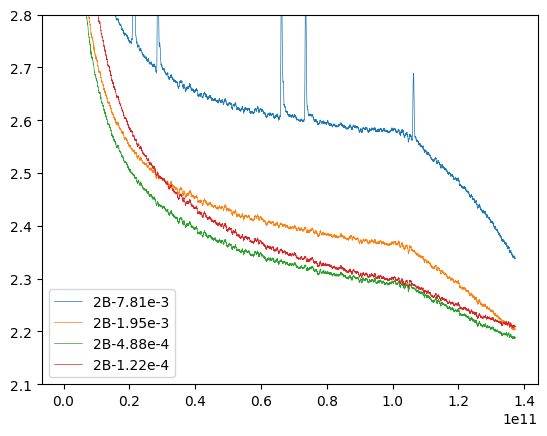

In [17]:
lrs = [
    # "1.56e-2",
    "7.81e-3",
    # "3.91e-3",
    "1.95e-3",
    # "9.77e-4",
    "4.88e-4",
    # "2.44e-4",
    "1.22e-4",
]

olmo25_2B_tc = plotdevice.CometmlRun("ai2", "olmo2-5-32bmup-ladder", f"mup32B-2140M-lr{lrs[0]}-olmo3$", name=f"2B-{lrs[0]}").get_time_series("throughput/total tokens")
olmo25_2B_ts = [
    plotdevice.CometmlRun("ai2", "olmo2-5-32bmup-ladder", f"mup32B-2140M-lr{lr}-olmo3$", name=f"2B-{lr}")
    .get_time_series(METRIC).transform_x_axis(olmo25_2B_tc)
    for lr in lrs
]
plot(olmo25_2B_ts, moving_average_smoothing=100, ylim=(2.1, 2.8))

32767